# Lab Assignment 08

## Group Members
    RAJENDRA KUJUR (214161008)
    ROHIT RAJ SINGH CHAUHAN (21416009)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import random
import math

In [2]:
df = pd.read_csv('./DiscriminantFunction/Train_file.csv', header= None)
df

0         1         2         3         4         5         6   \
0     -10.120651  2.515380  1.823152  1.508992 -1.719560 -1.894340 -1.105240   
1      -4.889809 -5.689037 -3.359693 -2.125163  0.261292 -1.499884  0.754239   
2      -1.694022 -5.086290 -4.164934 -2.412973 -4.749922 -0.730738 -0.726216   
3      -4.241995 -5.011858 -3.345426 -3.906843  1.229525  1.224371 -0.399490   
4      -3.101878 -6.134078 -3.250782 -3.051343  0.591492  0.893184 -1.925571   
...          ...       ...       ...       ...       ...       ...       ...   
86055  -1.635670  1.052293 -2.062325 -3.152921 -3.465196 -0.504529  0.610838   
86056  -5.595143 -6.340353  3.448276 -2.002302 -3.558274 -3.457089 -0.693206   
86057  -3.603726 -1.159764 -2.422005 -5.484069 -0.536871 -0.346626 -0.740322   
86058   0.107939 -2.618805  0.905410 -4.835304 -1.413340  1.852330 -3.697903   
86059  -6.129585 -5.575619 -3.638011 -1.245570  2.513147  0.986036 -2.560405   

             7         8         9   ...        51        52        53  \
0     -1.882580  1.283309 -1.349106  ...  0.028268 -0.163431  0.032981   
1     -1.677804  0.495266 -1.082571  ...  0.009443 -0.025915 -0.107059   
2     -2.307999  0.666796  0.516605  ...  0.049961 -0.055671  0.001667   
3     -1.617319 -0.427983  0.644910  ... -0.059464  0.055713 -0.002794   
4     -0.913248  0.228131 -0.977734  ...  0.128475 -0.208654 -0.075758   
...         ...       ...       ...  ...       ...       ...       ...   
86055 -3.374743  0.683704 -0.142989  ...  0.103537  0.020133 -0.026520   
86056  2.090948 -1.892945  1.206615  ... -0.097180 -0.014913 -0.072065   
86057 -0.805887 -1.325342  0.730794  ...  0.033955  0.092716 -0.116950   
86058 -0.210668 -0.973244  1.647932  ... -0.084836 -0.075895  0.111895   
86059 -0.785540  0.858516 -0.285694  ... -0.043609 -0.041786 -0.042790   

             54        55        56        57        58        59   60  
0      0.041419  0.062175 -0.025429  0.072103 -0.054116  0.049799  1.0  
1     -0.055360  0.010194 -0.097698 -0.105427 -0.088457 -0.021961  0.0  
2     -0.203994  0.225937  0.233620  0.110080  0.036043 -0.200711  0.0  
3     -0.028805 -0.081924 -0.095755  0.093118 -0.022315  0.148809  0.0  
4      0.121429 -0.085190  0.034585  0.233586  0.027971  0.197148  1.0  
...         ...       ...       ...       ...       ...       ...  ...  
86055 -0.061439 -0.131870  0.129076 -0.111301  0.000777 -0.061185  0.0  
86056  0.014003  0.255123  0.131761  0.096428  0.044609 -0.007932  0.0  
86057  0.097941  0.003125  0.075152  0.047308 -0.054637 -0.104156  0.0  
86058  0.050750  0.051910  0.005700  0.011824  0.003846 -0.010605  1.0  
86059 -0.028619 -0.019601  0.069441  0.120531  0.209762  0.000616  0.0  

[86060 rows x 61 columns]

## (a) Evaluate µ0, µ1, C0, C1 from instances in “Train_file.csv”.

In [3]:
label_0 = df.loc[df[60]==0.0]
label_0_feature = label_0.iloc[:,:60]
mu_0 = (np.mean(label_0_feature, axis = 0).to_numpy()).reshape(60, 1)

In [4]:
label_1 = df.loc[df[60]==1.0]
label_1_feature = label_1.iloc[:,:60]
mu_1 = (np.mean(label_1_feature, axis = 0).to_numpy()).reshape(60, 1)

In [ ]:
label_0 = label_0_feature.to_numpy().T
cov_0 = np.cov(label_0_feature)

In [6]:
label_1 = label_1_feature.to_numpy().T
cov_1 = np.cov(label_1_feature)

## (b) Construct parameters of the discriminant function with Gaussian assumption on instance distribution in classes.

In [7]:
p_0 = len(label_0[0])/df.shape[0]
p_1 = len(label_1[0])/df.shape[0]

In [8]:
def discriminationFunction(x):
    g = math.log(p_0/p_1) - \
    (1/2)*( mu_1.T.dot(np.linalg.inv(cov_1)).dot(mu_1) - mu_0.T.dot(np.linalg.inv(cov_0)).dot(mu_0)) - \
    (1/2) * math.log(np.linalg.det(cov_1)/np.linalg.det(cov_0)) + \
    x.T.dot((np.linalg.inv(cov_1).dot(mu_1) - np.linalg.inv(cov_0).dot(mu_0))) - \
    (1/2) * x.T.dot(np.linalg.inv(cov_1) - np.linalg.inv(cov_0)).dot(x)
    
    if g >= 0:
        return 1
    else:
        return 0

## (c) Read “Test_file.csv” consisting of 21516 instances of 61 dimensional arrays. For each array, the first 60 dimensions contain the feature values for the test data and the last dimension contains its actual label. Predict the label of each data instance from the testing set using the decision

In [9]:
test_df = pd.read_csv('./DiscriminantFunction/Test_file.csv', header = None)
test_df

0         1         2         3         4         5         6   \
0       3.863817 -4.783144 -3.905487 -0.535617 -1.551824 -1.499466 -0.859588   
1     -10.056757 -5.685840 -0.045440 -1.810329  3.860155 -0.612230 -1.352859   
2      -1.752938 -2.699559  1.510144  0.081531 -1.604532 -1.849043 -2.171057   
3      -3.170220 -4.744630  3.362495 -2.200058 -3.640497 -0.942428 -3.085365   
4      -3.519579 -3.659691  3.410805  0.665115 -5.036384 -3.107760 -1.921138   
...          ...       ...       ...       ...       ...       ...       ...   
21511  -4.640703 -6.032214 -1.624066 -3.331136 -0.618004  2.645090 -1.857692   
21512 -13.871496 -1.543369  2.646163 -2.945460 -0.626131 -0.512781 -1.960626   
21513  -2.755236 -5.391767 -3.613917 -3.302476 -0.078891  2.084580 -0.537193   
21514 -10.423629 -7.479863 -2.382976 -4.134115  2.327308  0.884072 -2.412532   
21515  -1.728446 -7.236165 -4.436367 -1.658110 -0.270304  0.212246 -3.870904   

             7         8         9   ...        51        52        53  \
0      0.372485 -0.649211 -0.391779  ...  0.009052  0.058107 -0.094742   
1     -0.210533  0.592775 -0.093317  ...  0.100559  0.015884 -0.046483   
2     -3.236153 -0.541043  0.442342  ... -0.070303 -0.012252  0.052579   
3      0.144203 -1.065229  0.425932  ...  0.193836 -0.050392  0.120305   
4     -0.518617  0.085033 -2.412228  ...  0.035903 -0.045471 -0.105559   
...         ...       ...       ...  ...       ...       ...       ...   
21511  0.732641 -1.038134  0.291109  ... -0.153948  0.083567 -0.062868   
21512 -0.756566  0.345094  1.276588  ...  0.048310  0.012396  0.013597   
21513 -2.114375  1.106411  0.196594  ... -0.090337 -0.006860  0.008645   
21514  0.214760 -1.258283  0.178755  ...  0.128608 -0.015133 -0.001821   
21515  1.676732 -2.713190  0.138415  ... -0.044669  0.145685  0.030762   

             54        55        56        57        58        59   60  
0      0.021947  0.042368 -0.036193  0.011716 -0.002627 -0.013202  1.0  
1      0.082804 -0.037946  0.025628 -0.174175  0.012218 -0.044811  0.0  
2     -0.022195 -0.023904  0.158927  0.005207  0.015620 -0.021611  1.0  
3     -0.158155 -0.065002 -0.165253 -0.173285 -0.096143  0.064330  1.0  
4      0.017580  0.021768  0.072975  0.027165  0.025080  0.024360  0.0  
...         ...       ...       ...       ...       ...       ...  ...  
21511 -0.055489  0.085687 -0.069467  0.085020  0.064494 -0.073432  0.0  
21512 -0.013765 -0.034505 -0.056556 -0.007279  0.013385  0.068573  0.0  
21513 -0.123282 -0.005024 -0.062541 -0.024066  0.015866 -0.038963  0.0  
21514 -0.217203 -0.079718  0.039196  0.193761 -0.071608  0.014457  0.0  
21515 -0.122765  0.092173  0.120561 -0.146506  0.006511  0.104112  1.0  

[21516 rows x 61 columns]

In [10]:
test_data = (test_df.iloc[:,:60]).to_numpy()
test_label = (test_df.iloc[:,60:]).to_numpy()
test_label_0 = test_df.loc[test_df[60]==0.0]
test_label_1 = test_df.loc[test_df[60]==1.0]

In [11]:
true_1 = 0
true_0 = 0
j = 0
for i in range(len(test_data)):
        if discriminationFunction(test_data[i]) == 1.0 and test_label[i][0] == 1.0:
            true_1 += 1
        elif discriminationFunction(test_data[i]) == 0.0 and test_label[i][0] == 0.0:
            true_0 += 1
        else:
            j += 1
rho_0 = true_0 / (test_label_0.shape[0])
rho_1 = true_1 / (test_label_1.shape[0])
rho = (true_0 + true_1)/ test_df.shape[0]

### Results 

In [12]:
print(f'Rho_0 : {rho_0}')
print(f'Rho_1 : {rho_1}')
print(f'Rho : {rho}')

Rho_0 : 0.8592260235558048
Rho_1 : 0.951007579959327
Rho : 0.9053727458635434


## 2. Application of Linear Discriminant Analysis (LDA) in understanding the separability in the dataset of MFCC features used for classifying Shouted and Normal Speech. The two files MFCC_N.npy and MFCC_S.npy respectively store the features of normal and shouted speech.

### a) Load the two datasets MFCC_N.npy and MFCC_S.npy into arrays N and S respectively. Use the python function np.load( filename ).

In [13]:
N = np.load('./LDA/MFCC_N.npy')
S = np.load('./LDA/MFCC_S.npy')

In [14]:
N.shape
S.shape

(5000, 60)

### b) Compute centroids (𝑚 , 𝑚 ) and covariance matrices (𝐶 , 𝐶 ) of both arrays.

In [15]:
centroid_n = np.mean(N, axis = 0)
centroid_s = np.mean(S, axis = 0)
cov_n = np.cov(N.T)
cov_s = np.cov(S.T)

### c) Compute the optimal direction vector 𝜔 (unit vector) for LDA.

In [16]:
Sw = cov_n + cov_s
M=centroid_n-centroid_s
S1=np.linalg.inv(Sw)
U=np.dot(S1,M.T)
W=U/np.linalg.norm(U)

### d) Project the vector data in arrays N and S to generate the respective array of scalars zN and zS.

In [17]:
Zn=np.dot(N,W)
Zs=np.dot(S,W)

### e) Plot the normalized histograms of zN and zS in two different colors (red and blue).

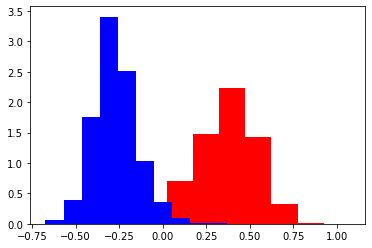

In [18]:
plt.hist(Zn,color='r', density = True)
plt.hist(Zs,color='b', density = True)
plt.show()

### 3. Application of K-Means Clustering in image segmentation. Consider the R-G-B values of each pixel of the input image as 3-dimensional feature vector. Initialize K-Means through data labels or cluster centroids. Perform K-means iterations till convergence and report the K cluster centroids. Revisit the Image and replace each pixel color (R-G-B) with the nearest cluster centroid (rounded) color values. Repeat this experiment with different values of K and visualize the results.

In [19]:
def KMeansClustering(k, image_name):
    img = image.imread(image_name)
    plt.axis('off')
    plt.imshow(img)
    plt.title('Original Image')
    plt.show()
    
    orig_img = img.reshape(321, 481, 3)
    orig_img = orig_img.reshape(321*481, 3)

    # intialize the centroid as random values
    k_centroid = [[random.randint(0, 255+1), random.randint(0, 255+1), random.randint(0, 255+1)] for _ in range(k)]
    
    k_centroid = np.array(k_centroid)
    
    for u in range(6):
        # store the updated image
        updated_img = []

        # in each iteration new cluster will be generated
        k_cluster = [[] for i in range(k)]

        for i in range(orig_img.shape[0]):
            dist = []

            # store distance from all the centroids
            for j in range(len(k_centroid)):
                dist.append(np.linalg.norm(orig_img[i]-k_centroid[j]))
            dist = np.array(dist)

            # find the minimum distance' index
            min_dist_index = np.argmin(dist)

            # update the pixel value of that index to the nearest centroid rgb values
            updated_img.append(k_centroid[min_dist_index])

            # update the cluster that this particular rgb value belongs to cluster
            k_cluster[min_dist_index].append(orig_img[i])

        # update the clusters after each iteration
        for i in range(k):
            k_cluster[i] = np.array(k_cluster[i])

            if len(k_cluster[i]) > 0:
                k_centroid[i] = np.mean(k_cluster[i], axis = 0, dtype = int)
            else:
                continue

        # convert to numpy array for plotting
        updated_img = np.array(updated_img)
        new_img = updated_img.reshape(321, 481, 3)
    # plot the image
    plt.axis('off')
    plt.imshow(new_img)
    plt.title(f'Image with k : {k}')
    plt.show()


#### Test Case 1

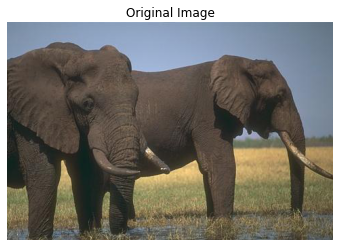

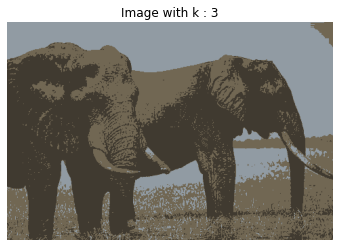

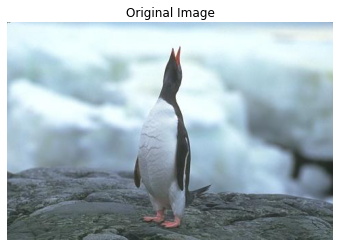

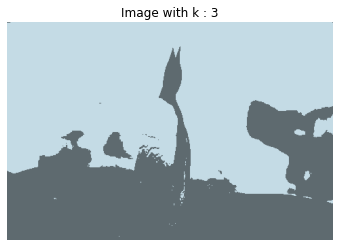

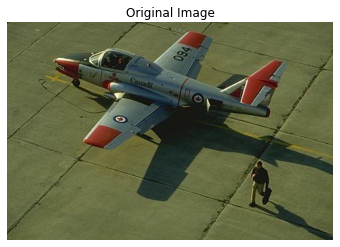

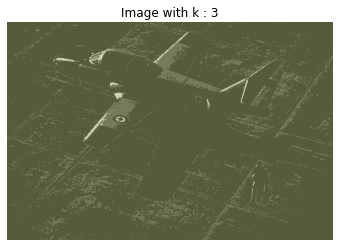

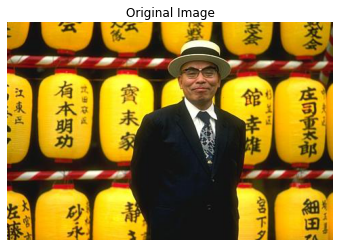

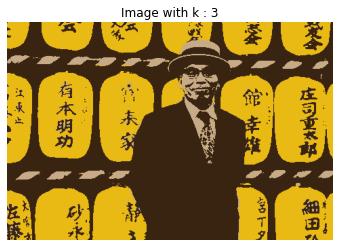

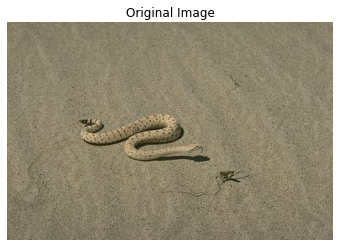

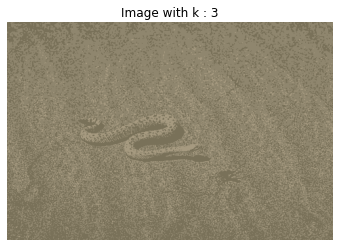

In [20]:
k = 3
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_1.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_2.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_3.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_4.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_5.jpg'
KMeansClustering(k, image_name)

#### Test Case 2

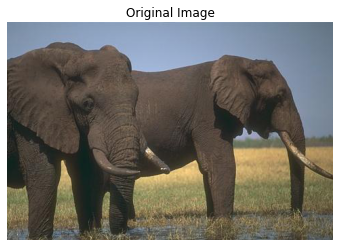

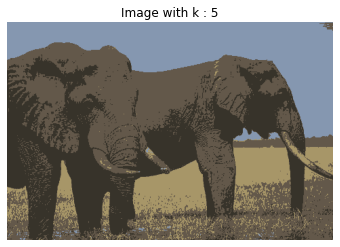

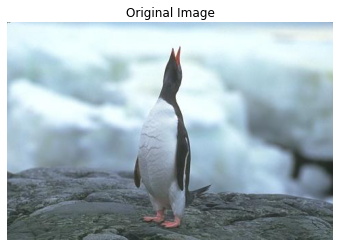

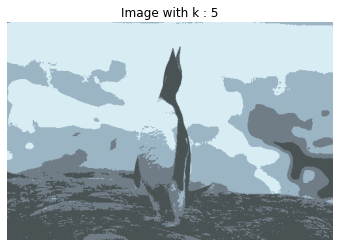

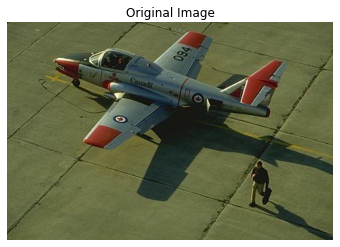

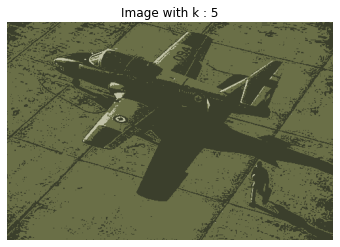

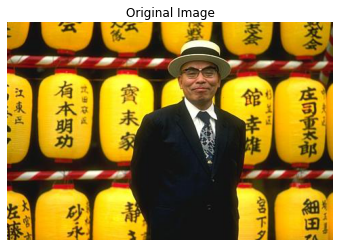

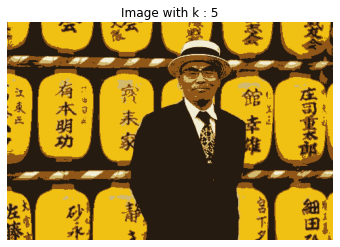

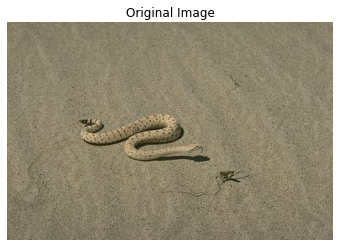

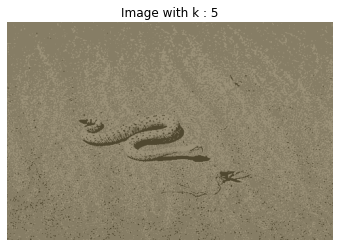

In [21]:
k = 5
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_1.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_2.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_3.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_4.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_5.jpg'
KMeansClustering(k, image_name)

#### Test Case 3

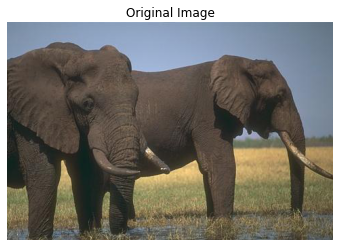

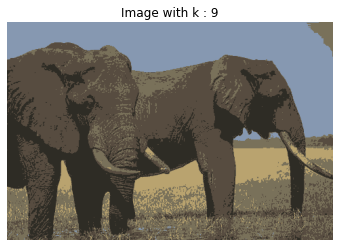

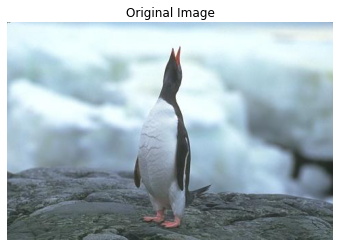

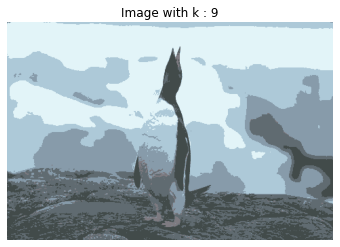

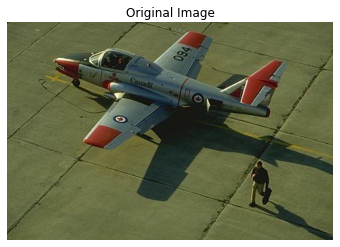

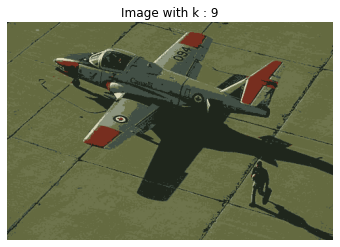

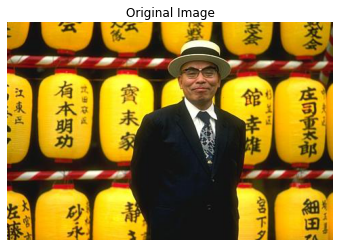

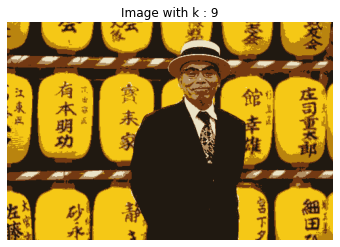

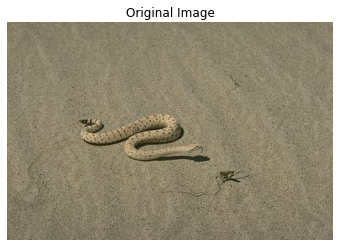

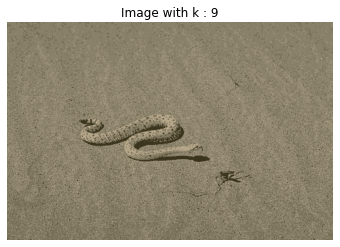

In [22]:
k = 9
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_1.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_2.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_3.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_4.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_5.jpg'
KMeansClustering(k, image_name)

#### Test Case 4

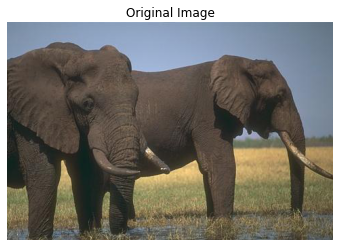

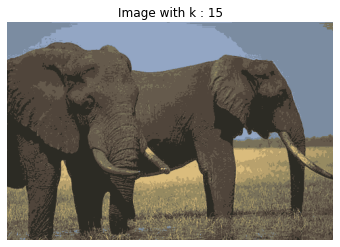

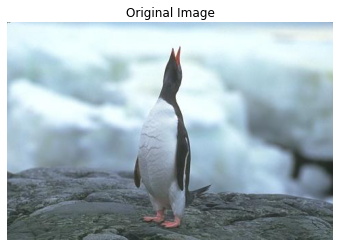

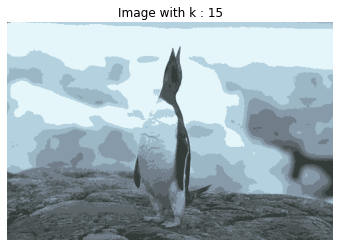

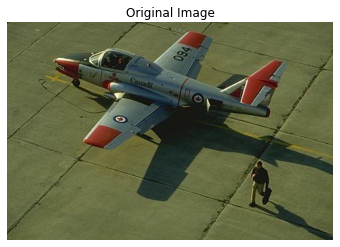

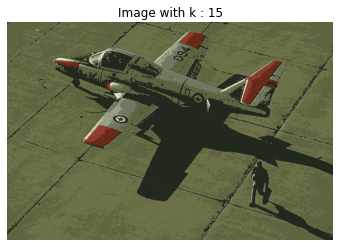

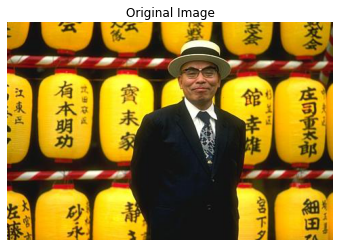

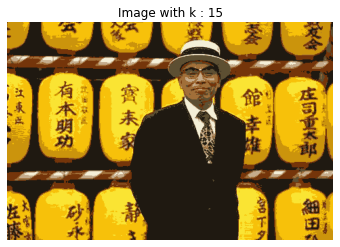

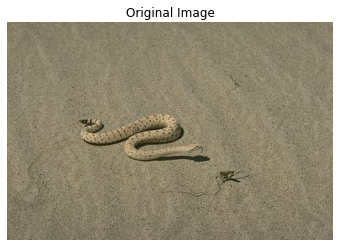

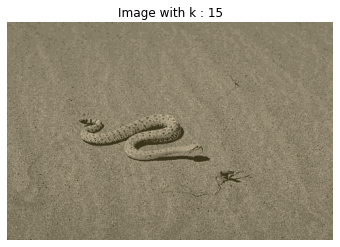

In [23]:
k = 15
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_1.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_2.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_3.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_4.jpg'
KMeansClustering(k, image_name)
image_name = './KMeansImageSegmentation/KMeans_Seg_Input_Image_5.jpg'
KMeansClustering(k, image_name)